**SETUP INSTRUCTIONS**

Run each cell below to set up the environment. Make sure to adjust the subject ID and path variables.
Run pupilLabsDebug BEFORE this program to ensure measurements are as expected.

In [31]:
path_base = 'C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/'
# can add subject number + date
subj_base = 'plr-sub-003_ses-01_dat-20230705' # plr-sub-subjectID-ses-sesID-dat-date - sub-xxx-ses-xx-dat-yyyymmdd

In [32]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


Light engine is now set up, and so it is now possible to access the methods from the REST API. 

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:368: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for led, df in self.data.groupby(["led"]):
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is de

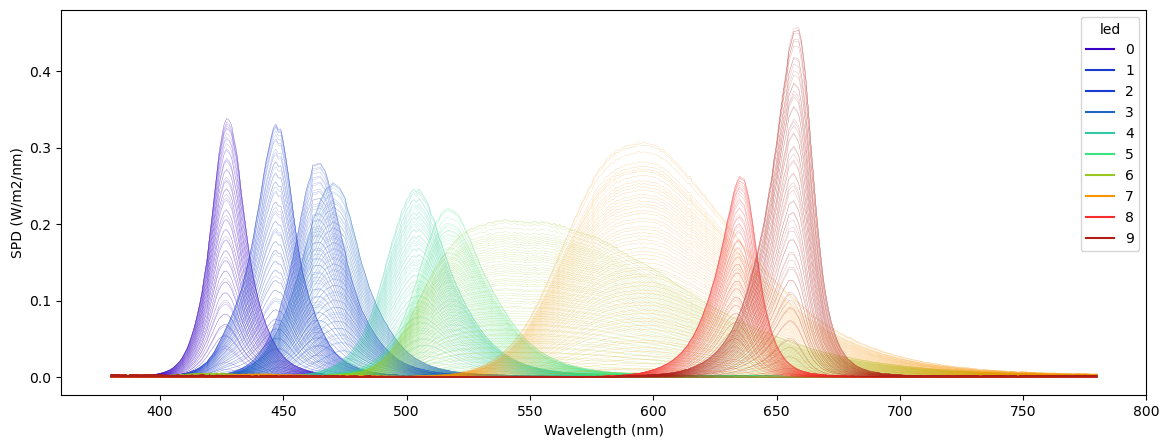

In [33]:
# from pyplr.calibrate import CalibrationContext as calibrationContext
# Calibration - important
import pyplr.calibrate as calb
from importlib import reload
reload(calb)
# file type to be read must be in format of:
# led | intensity | wavelength 1 (380) | wavelength 2 | ... | wavelength n (780)

cc = calb.CalibrationContext(
    'S2_corrected_oo_spectra.csv', binwidth=1)
_ = cc.plot_calibrated_spectra()


In [35]:
# calculate the peak spectral sensitivity for each LED at its maximum intensity setting
cc.lkp.xs(key=4095, level=1).idxmax(axis=1)

led
0    427
1    447
2    465
3    470
4    505
5    517
6    540
7    594
8    635
9    659
dtype: int64

In [36]:
from pyplr import stlab

#50mW spec - retrieved from examples/pfr/stimuli/PLR-3000-50-mw.dsf
white_spec = [176, 184, 80, 0, 0, 0, 308, 122, 0, 0]
d.turn_off()

<Response [200]>

In [37]:
from time import sleep
# import random # not using this library unless we want to randomize stims
from pyplr.pupil import PupilCore
from pyplr.utils import unpack_data_pandas
from pyplr.protocol import input_subject_id, subject_dir
# Connect to Pupil Core
p = PupilCore()
p.check_3d_model()

> Refit the 3d model? [y/n]: n


Please enter subject ID: 003
> Grabbing 225 seconds of pupil.1.3d
> Waiting for a light to stamp...
> Light stamped on frame.world at 30432.58054
> Waiting for a light to stamp...
> Light stamped on frame.world at 30499.074408
> Waiting for a light to stamp...
> Light stamped on frame.world at 30565.496257
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
> PupilGrabber done grabbing 225 seconds of pupil.1.3d


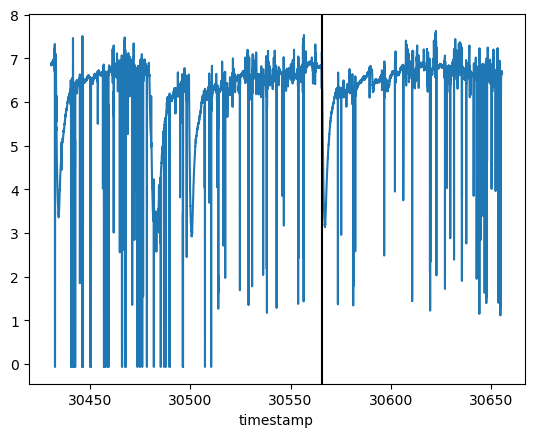

In [38]:
# PIPR STIMS - USE THIS ONE
d.turn_off()
subject_id = input_subject_id()
subj_dir = subject_dir(subject_id)
sleep(2)
ISI = 60 # interstimulus time, in seconds
num_trials = 3 # total number of trials
run_time = ISI*num_trials + 5*num_trials + 30 # appropriate offset to account for stim duration + sleeps


# Start a new recording called "my_recording"
p.command('R my_recording')

# Wait a few seconds
sleep(2)

# Make an annotation for when the light comes on
annotation = p.new_annotation('LIGHT_ON')

# Start the .light_stamper(...) and .pupil_grabber(...)
# this only captures one eye
# pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=25) # time here is TOTAL run time
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=run_time) # time here is TOTAL run time

sleep(2)
##################################
# Administer light stimulus here #
i = 0
# random.shuffle(led_list) # use this if stims should be randomized
while (i < num_trials):
    intensities = white_spec
    lst_future = p.light_stamper(annotation=annotation, timeout=10)
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(ISI)
    i+=1
    sleep(5) # make sure there is extra time so that trials do not overlap
##################################

# Wait for the futures
while lst_future.running() or pgr_future.running():
    print('Waiting for futures...')
    sleep(1)

# End recording
p.command('r')

# Get the timestamp and pupil data
timestamp = lst_future.result()[1]
data = unpack_data_pandas(pgr_future.result())
# timestamps are displayed in the output as well
# Plot the PLR
ax = data['diameter_3d'].plot()
ax.axvline(x=timestamp, color='k')

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
30430.519133,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.2640630023231965, 0.8126601783581922]",59.888282,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-5.499122965137429, -7.33949890372...",6.878129,"{'center': [50.70009644605373, 35.969245755227...","[50.70009644605373, 35.9692457552271]",1.0,2.047750,-2.055648
30430.531274,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.2642703466161615, 0.8124330608334066]",59.743120,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-5.493168078704096, -7.33287629082...",6.859453,"{'center': [50.73990655030301, 36.012852319985...","[50.73990655030301, 36.01285231998593]",1.0,2.047032,-2.054724
30430.546268,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.26460426281671684, 0.812679779088735]",59.714213,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-5.485258842067573, -7.33838144498...",6.855768,"{'center': [50.80401846080964, 35.965482414962...","[50.80401846080964, 35.96548241496287]",1.0,2.047629,-2.053918
30430.567396,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.26474889929217604, 0.812534027518448]",59.781233,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-5.48176006303814, -7.334743736544...",6.863740,"{'center': [50.8317886640978, 35.9934667164579...","[50.8317886640978, 35.99346671645797]",1.0,2.047235,-2.053384
30430.586297,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.26494486986673366, 0.8128360092950044]",59.540264,0.947548,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-5.476514711123004, -7.34104056529...",6.833889,"{'center': [50.869415014412866, 35.93548621535...","[50.869415014412866, 35.93548621535915]",1.0,2.047917,-2.052927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655.448848,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.2859403702699896, 0.81260635724381]",58.302506,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-4.963242732016824, -7.29749188657...",6.656636,"{'center': [54.900551091838004, 35.97957940918...","[54.900551091838004, 35.97957940918847]",1.0,2.043205,-1.990054
30655.469397,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.285988409975429, 0.8127043953345776]",58.172576,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-4.961814104576962, -7.29938082578...",6.640746,"{'center': [54.909774715282374, 35.96075609576...","[54.909774715282374, 35.96075609576109]",1.0,2.043409,-1.989931
30655.488401,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.28606359672473475, 0.812965659215566]",58.279298,1.000000,"{'center': [-1.1960678240172071, -2.5686552563...","{'center': [88.30020116311528, 79.714295137472...","{'center': [-4.9606743501148145, -7.3061739185...",6.654114,"{'center': [54.92421057114907, 35.910593430611...","[54.92421057114907, 35.91059343061133]",1.0,2.044143,-1.989964


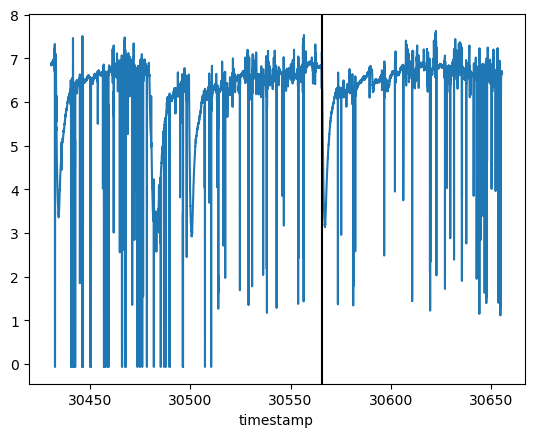

In [39]:
data = unpack_data_pandas(pgr_future.result())
# timestamps are displayed in the output as well
# Plot the PLR
ax = data['diameter_3d'].plot()
ax.axvline(x=timestamp, color='k')
# display data from pandas table
data

In [40]:
import os  

# os.makedirs('C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata', exist_ok=True) 

data.to_csv(path_base + subj_base + '.csv')

**DATA PROCESSING BEGINS BELOW**

In [41]:
new_data = data[['confidence','id','diameter','diameter_3d']]

In [42]:
samples = new_data
samples

,confidence,id,diameter,diameter_3d
timestamp,,,,
30430.519133,1.000000,1,59.888282,6.878129
30430.531274,1.000000,1,59.743120,6.859453
30430.546268,1.000000,1,59.714213,6.855768
30430.567396,1.000000,1,59.781233,6.863740
30430.586297,0.947548,1,59.540264,6.833889
...,...,...,...,...
30655.448848,1.000000,1,58.302506,6.656636
30655.469397,1.000000,1,58.172576,6.640746
30655.488401,1.000000,1,58.279298,6.654114


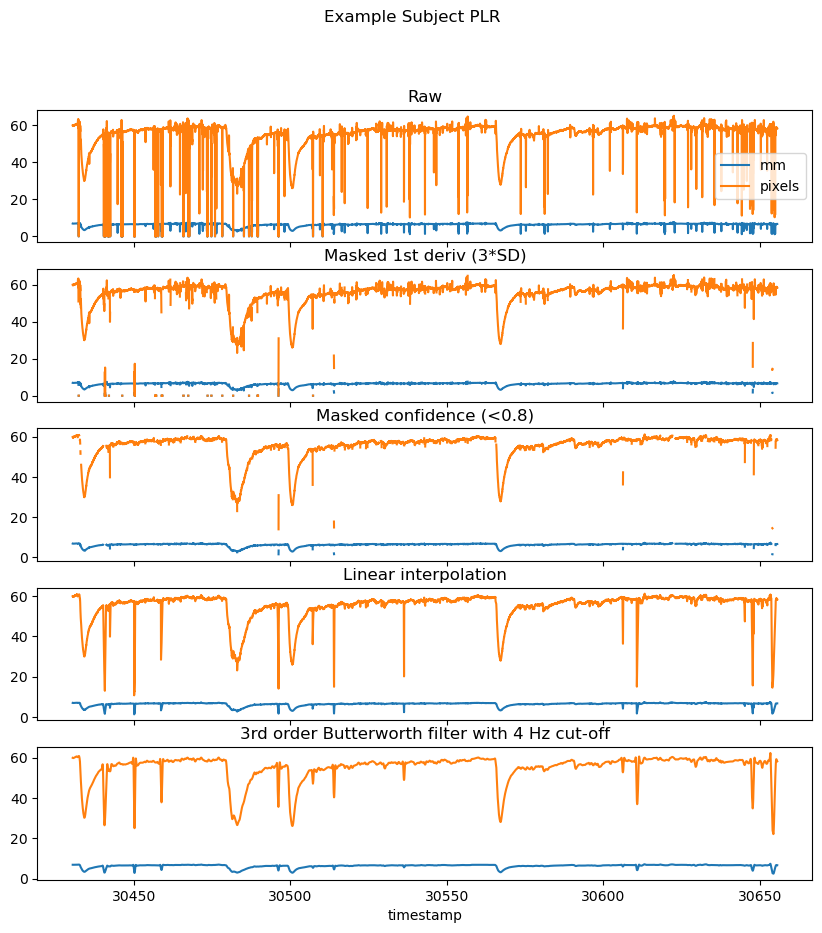

In [43]:
from pyplr import graphing
from pyplr import preproc
import matplotlib.pyplot as plt

# Sampling frequency
SAMPLE_RATE = 120

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Example Subject PLR')

# Plot the raw data
samples[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples = preproc.mask_pupil_first_derivative(
    samples, threshold=3.0, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples = preproc.mask_pupil_confidence(
    samples, threshold=0.8, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples = preproc.interpolate_pupil(
    samples, interp_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples = preproc.butterworth_series(
    samples, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
# Read in csv file and extract the column with header "CVR"
# df_pipr = pd.read_csv("C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/sub-999_ses-02_dat-20230419.csv")
df_pipr = pd.read_csv(path_base + subj_base + '.csv')

# Print header names
print(df_pipr.columns)

# Extract the column with header "CVR"
timestamps = df_pipr["timestamp"]
# Extract the column with header "CVR_SI"
diam_3d = df_pipr["diameter_3d"]

Index(['timestamp', 'id', 'topic', 'method', 'norm_pos', 'diameter',
       'confidence', 'sphere', 'projected_sphere', 'circle_3d', 'diameter_3d',
       'ellipse', 'location', 'model_confidence', 'theta', 'phi'],
      dtype='object')


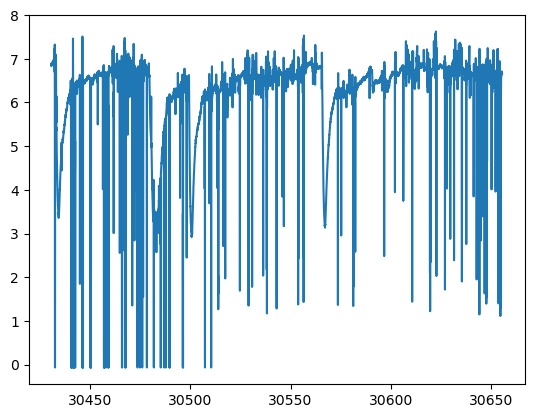

In [46]:
fig = plt.figure()
plt.plot(timestamps, diam_3d)

This is copied from the output of cell 11
> Light stamped on frame.world at 689970.0772810001
> Waiting for a light to stamp...
> Light stamped on frame.world at 690036.3856500001
> Waiting for a light to stamp...
> Light stamped on frame.world at 690102.918729
> Waiting for a light to stamp...
> Light stamped on frame.world at 690169.428877
> Waiting for a light to stamp...
> Light stamped on frame.world at 690235.923252
> Waiting for a light to stamp...
> Light stamped on frame.world at 690302.5674930001

**Edit Cell Below with Timestamps**

In [48]:
# NEED TO EDIT THIS WITH NEW TIMESTAMPS
# finds indices of each timestamp (or closest one before, if exact match cannot be found).
# finds list of timestamps where condition is true, extracts array of just this, then takes last value (closest stamp)
stamp1 = np.where(timestamps <= 30432.58054)[0][-1]
stamp2 = np.where(timestamps <= 30499.074408)[0][-1]
stamp3 = np.where(timestamps <= 30565.496257)[0][-1]
stamps = [stamp1, stamp2, stamp3]
stamps

[96, 3300, 6486]

In [49]:
from pyplr import utils
from copy import deepcopy

In [50]:
df_data = df_pipr[['timestamp', 'confidence','id','diameter','diameter_3d']]
df_data

,timestamp,confidence,id,diameter,diameter_3d
0,30430.519133,1.000000,1,59.888282,6.878129
1,30430.531274,1.000000,1,59.743120,6.859453
2,30430.546268,1.000000,1,59.714213,6.855768
3,30430.567396,1.000000,1,59.781233,6.863740
4,30430.586297,0.947548,1,59.540264,6.833889
...,...,...,...,...,...
10528,30655.448848,1.000000,1,58.302506,6.656636
10529,30655.469397,1.000000,1,58.172576,6.640746
10530,30655.488401,1.000000,1,58.279298,6.654114
10531,30655.507526,0.980709,1,58.493898,6.680623


In [52]:
# extract ranges from samples based on event timing and sample count
# adapted from extract() from utils.py
# set variables - change as necessary
samples = df_data
event_starts = stamps 
onset_time = 1
duration_time = 60
offset = -60*onset_time # 60 sample rate, start 1s before light to get baseline
duration = 60*duration_time  # 60 sample rate

# find the indexes of the event starts, and offset by sample count
range_idxs = (
    np.searchsorted(samples.index, event_starts, "left") + offset
)
range_duration = duration


In [53]:
range_idxs

array([  36, 3240, 6426], dtype=int64)

In [54]:
# make a hierarchical index
samples["orig_idx"] = samples.index
midx = pd.MultiIndex.from_product(
    [list(range(len(event_starts))), list(range(range_duration))],
    names=["event", "onset"],
)

# TODO: can add option for time index here

# get the samples
df = pd.DataFrame()
idx = 0
for start_idx in range_idxs:
    # get the start time and add the required number of indices
    end_idx = start_idx + range_duration - 1  # .loc indexing is inclusive
    if end_idx >= len(samples):
        end_idx = len(samples) - 1
    new_df = deepcopy(
        samples.loc[samples.index[start_idx] : samples.index[end_idx]]
    )
    #for ba in borrow_attributes:
        #new_df[ba] = events.iloc[idx].get(ba, float("nan"))
    df = pd.concat([df, new_df])
    idx += 1
df.index = midx
print("Extracted ranges for {} events".format(len(event_starts)))

Extracted ranges for 3 events


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_7944\2016008756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples["orig_idx"] = samples.index


In [55]:
df.index

MultiIndex([(0,    0),
            (0,    1),
            (0,    2),
            (0,    3),
            (0,    4),
            (0,    5),
            (0,    6),
            (0,    7),
            (0,    8),
            (0,    9),
            ...
            (2, 3590),
            (2, 3591),
            (2, 3592),
            (2, 3593),
            (2, 3594),
            (2, 3595),
            (2, 3596),
            (2, 3597),
            (2, 3598),
            (2, 3599)],
           names=['event', 'onset'], length=10800)

In [56]:
from pyplr import graphing
from pyplr import preproc
# Calculate baselines
baselines = df.loc[:, range(0, -offset), :].mean(level=0)

# New columns for percent signal change
df = preproc.percent_signal_change(
    df, baselines, ['diameter_3d', 'diameter'])
df


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_7944\2404135914.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  baselines = df.loc[:, range(0, -offset), :].mean(level=0)


timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                   
0     0      30431.220180    1.000000   1  60.198425     6.912658        36   
      1      30431.239800    1.000000   1  60.143869     6.905483        37   
      2      30431.258160    1.000000   1  60.209539     6.913729        38   
      3      30431.278738    1.000000   1  60.194857     6.911425        39   
      4      30431.296338    0.990289   1  60.258311     6.919813        40   
...                   ...         ...  ..        ...          ...       ...   
2     3595   30640.417673    1.000000   1  58.152814     6.656926     10021   
      3596   30640.455990    1.000000   1  58.031743     6.642091     10022   
      3597   30640.495239    1.000000   1  58.080193     6.646675     10023   
      3598   30640.520373    1.000000   1  58.057961     6.641742     10024   
      3599   30640.546882    0.981094   1  58.160199     6.652690     10025   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            6.960142     6.852325  
      1            6.849122     6.755487  
      2            6.976711     6.872052  
      3            6.941066     6.845991  
      4            7.070845     6.958622  
...                     ...          ...  
2     3595        -2.328379    -1.945133  
      3596        -2.546043    -2.149278  
      3597        -2.478782    -2.067583  
      3598        -2.551161    -2.105069  
      3599        -2.390532    -1.932680  

[10800 rows x 8 columns]

In [57]:
from pyplr.plr import PLR

average_plr = df.mean(level=1)['diameter_3d'].to_numpy()
plr = PLR(average_plr,
          sample_rate=60,
          onset_idx=-offset,
          stim_duration=1)

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_7944\2953176601.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  average_plr = df.mean(level=1)['diameter_3d'].to_numpy()


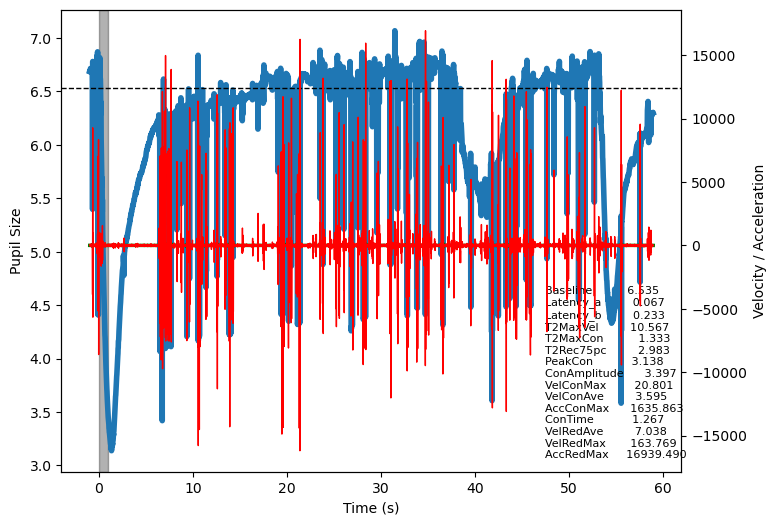

In [58]:
fig = plr.plot(vel=True, acc=True, print_params=True)

In [59]:
params = plr.parameters()
params

,value
Baseline,6.535208
Latency_a,0.066667
Latency_b,0.233333
T2MaxVel,10.566667
T2MaxCon,1.333333
T2Rec75pc,2.983333
PeakCon,3.138193
ConAmplitude,3.397015
VelConMax,20.801363
VelConAve,3.594562


In [60]:
df.to_csv(path_base + subj_base + '-processed.csv') # processed data with adjusted onset indices (time in seconds)

In [61]:
params.to_csv(path_base + subj_base + '-plr-params.csv') # pupillary light response calculated parameters